In [1]:
import os
import torch
from diffusers import DiffusionPipeline
from diffusers.utils import make_image_grid, load_image


In [2]:
pipeline = DiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("mps")
pipeline.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
data_path = "../covdor"
images = os.listdir(data_path)

img = os.path.join(
    data_path,
    images[0]
)

  0%|          | 0/50 [00:00<?, ?it/s]

/Users/obobojk/Documents/GitHub/diploma/venv/lib/python3.10/site-packages/diffusers/image_processor.py:147: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


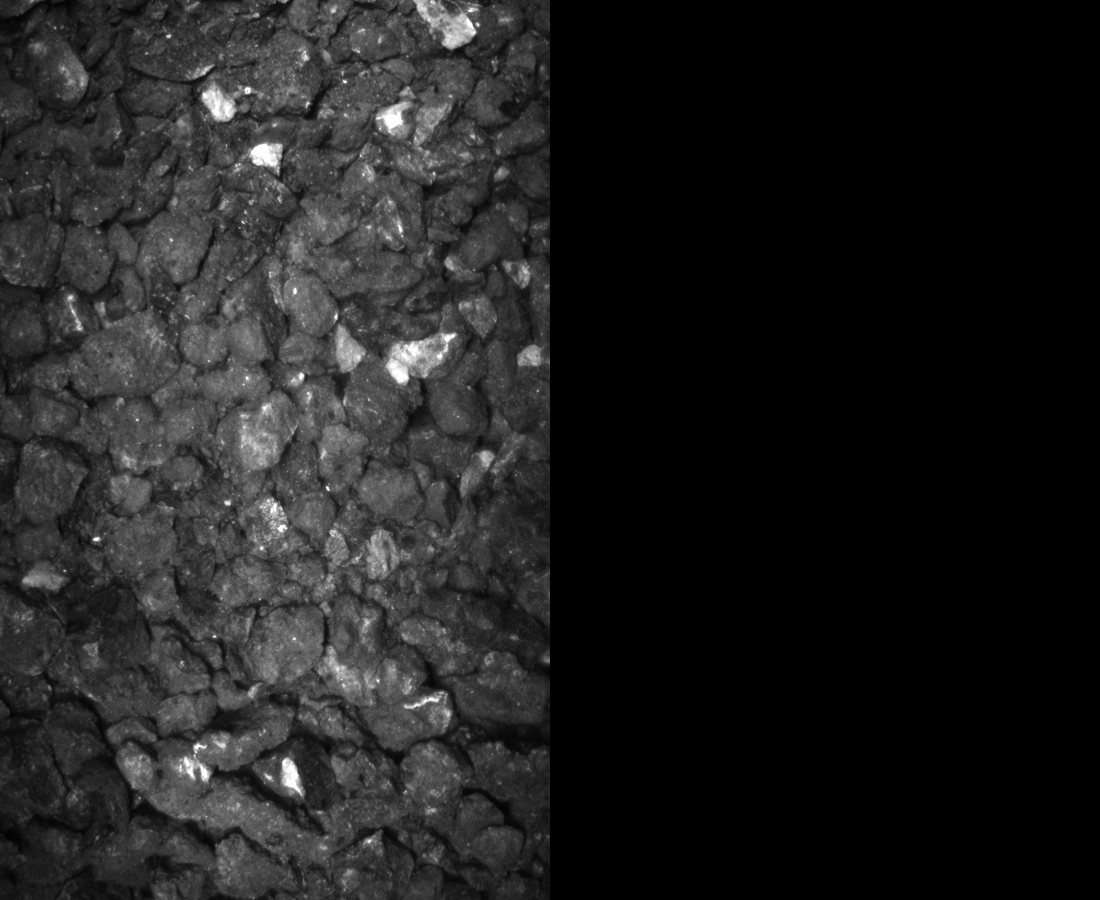

In [4]:
init_image = load_image(img)

prompt = "An industrial grayscale image showing a textured surface of unevenly shaped rocks or minerals. The rocks are tightly packed, varying in size, with no visible color differences. The image has a raw, unprocessed appearance, with strong contrasts highlighting the ruggedness of the material."

image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)